# Calculations related to f_diffuse (aka $f_d$) [v2]
##    These were presented in XYZ+2019 and Macquart+2020 (more or less)
##    But see Simha+2020 for the latest
##    Now includes error in $f_d$

In [1]:
# imports
from importlib import reload, resources
import numpy as np
import os


from matplotlib import pyplot as plt

from scipy import interpolate

from astropy import units
from astropy.table import Table

from frb.dm import igm
from frb.defs import frb_cosmo

/home/xavier/Projects/FRB_Stuff/FRB/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


In [42]:
%matplotlib ipympl

# Stellar mass (baryons locked up)

In [3]:
#stellar_mass_file = resource_filename('frb', 'data/IGM/stellarmass.dat')
stellar_mass_file = os.path.join(resources.files('frb'), 'data','IGM','stellarmass.dat')

In [4]:
rho_mstar_tbl = Table.read(stellar_mass_file, format='ascii')

In [5]:
rho_mstar_tbl[0:5]

z,t_Gyr,rho_Mstar
float64,float64,float64
0.0,13.48,576600000.0
0.1,12.18,560400000.0
0.2,11.05,542400000.0
0.3,10.06,522900000.0
0.4,9.194,501900000.0


## Method

In [6]:
zval = np.linspace(0., 4., 100)
rho_Mstar = igm.avg_rhoMstar(zval, remnants=False)

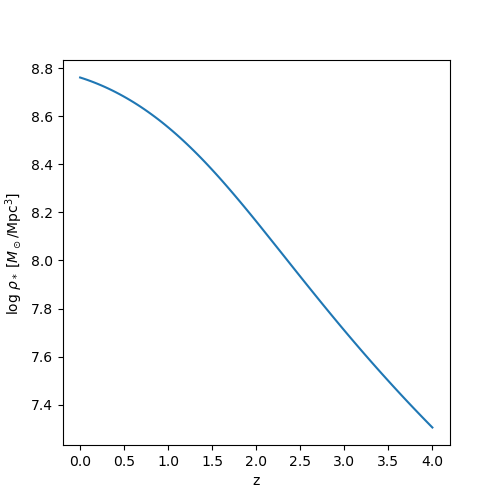

In [7]:
fig = plt.figure(figsize=(5,5))
plt.clf()
ax = plt.gca()
ax.plot(zval, np.log10(rho_Mstar.value))
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$\log \, \rho_* \; [M_\odot/ \rm Mpc^3]$ ')
plt.show()

## Following Fukugita 2004 (Table 1)

In [8]:
M_sphere = 0.0015
M_disk = 0.00055
M_WD = 0.00036
M_NS = 0.00005
M_BH = 0.00007
M_BD = 0.00014

In [9]:
f_remnants = (M_WD+M_NS+M_BH+M_BD) / (M_sphere+M_disk)
f_remnants

0.30243902439024395

In [10]:
rho_Mstar_full = igm.avg_rhoMstar(zval, remnants=True)

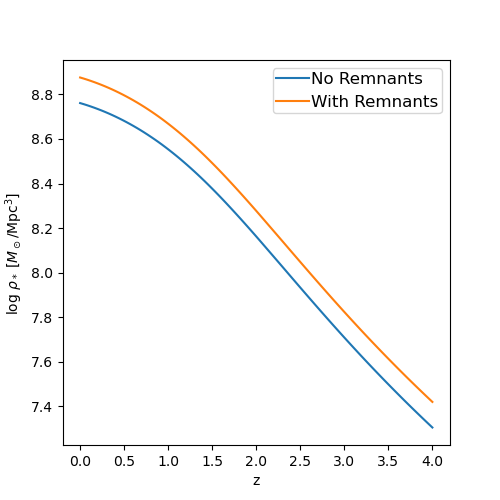

In [11]:
fig = plt.figure(figsize=(5,5))
plt.clf()
ax = plt.gca()
ax.plot(zval, np.log10(rho_Mstar.value), label='No Remnants')
ax.plot(zval, np.log10(rho_Mstar_full.value), label='With Remnants')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$\log \, \rho_* \; [M_\odot/ \rm Mpc^3]$ ')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

## ISM

### $z=0$  -- Fukugita 2004

In [12]:
M_HI = 0.00062
M_H2 = 0.00016
M_ISM = M_HI + M_H2

In [13]:
M_ISM/(M_sphere+M_disk)

0.38048780487804873

In [14]:
# In code
f04_dict = igm.fukugita04_dict()
M_ISM = f04_dict['M_HI'] + f04_dict['M_H2']
f_ISM_0 = M_ISM/(f04_dict['M_sphere']+f04_dict['M_disk'])
f_ISM_0

0.38048780487804873

## $z>0$ -- Could use DLAs and [silly] K-S relation?

## Instead, assume $M_{\rm ISM} = M_*$ at $z=1$ and smoothly interpolate with time

In [15]:
t0 = frb_cosmo.age(0.).to('Gyr').value
t1 = frb_cosmo.age(1.).to('Gyr').value
#
t0, t1

(13.786885302009708, 5.851343299925346)

In [16]:
t1_2 = (t0+t1)/2.

In [17]:
f_ISM = interpolate.interp1d([t0, t1_2, t1], [f_ISM_0, 0.58, 1.], kind='quadratic',
                     bounds_error=False, fill_value=1.)

In [18]:
tval = frb_cosmo.age(zval).to('Gyr').value

In [19]:
f_ISM(tval)

array([0.3804878 , 0.39549596, 0.4137778 , 0.4347084 , 0.45775511,
       0.48246413, 0.50844919, 0.5353821 , 0.5629846 , 0.59102146,
       0.61929446, 0.64763734, 0.67591128, 0.70400109, 0.73181187,
       0.75926613, 0.78630126, 0.8128674 , 0.83892553, 0.86444586,
       0.88940642, 0.91379187, 0.93759243, 0.96080299, 0.98342234,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

### Do it

In [20]:
reload(igm)
rhoISM = igm.avg_rhoISM(zval)

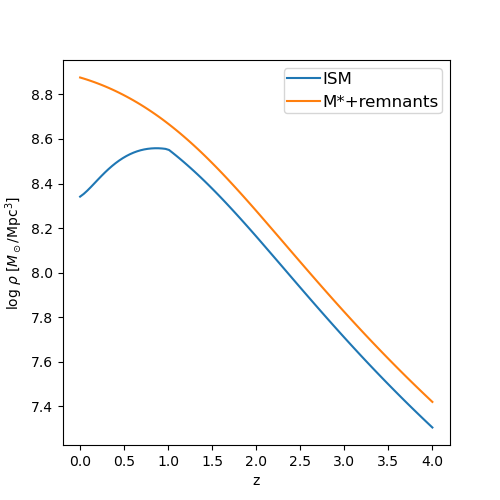

In [26]:
fig = plt.figure(figsize=(5,5))
plt.clf()
ax = plt.gca()
ax.plot(zval, np.log10(rhoISM.value), label='ISM')
ax.plot(zval, np.log10(rho_Mstar_full.value), label='M*+remnants')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$\log \, \rho \; [M_\odot/ \rm Mpc^3]$ ')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

## $Y$ -- Helium
    https://arxiv.org/abs/1807.09774

In [23]:
#He_file = resource_filename('frb', 'data/IGM/qheIII.txt')
He_file = os.path.join(resources.files('frb'),'data','IGM','qheIII.txt')

In [24]:
qHeIII = Table.read(He_file, format='ascii')

In [25]:
qHeIII

z,Q_HeIII_18,Q_HeIII_18_l,Q_HeIII_18_u,Q_HeIII_21,Q_HeIII_21_l,Q_HeIII_21_u
float64,float64,float64,float64,float64,float64,float64
12.0,1e-10,1e-10,1e-10,1e-10,1e-10,1e-10
11.988,4.374927e-09,2.218632e-10,1.508848e-07,1.860788e-09,2.667322e-10,1.104288e-08
11.976,8.743113e-09,3.519406e-10,3.034705e-07,3.67851e-09,4.431452e-10,2.215664e-08
11.964,1.320629e-08,4.904414e-10,4.578895e-07,5.554472e-09,6.294819e-10,3.344437e-08
11.952,1.776445e-08,6.373657e-10,6.141419e-07,7.488672e-09,8.257424e-10,4.490605e-08
...,...,...,...,...,...,...
2.054,1.0,1.0,1.0,1.0,1.0,1.0
2.042,1.0,1.0,1.0,1.0,1.0,1.0
2.03,1.0,1.0,1.0,1.0,1.0,1.0


### Plot

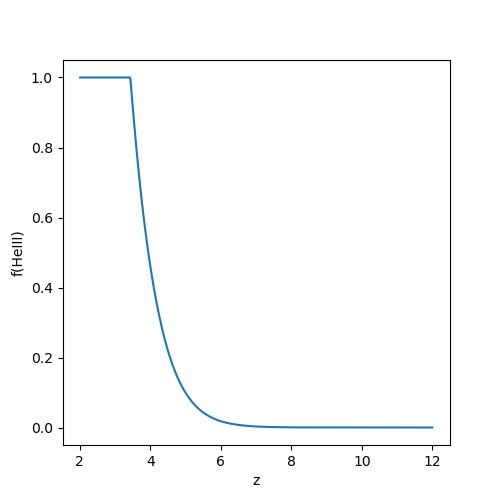

In [27]:
fig = plt.figure(figsize=(5,5))

plt.clf()
ax=plt.gca()
ax.plot(qHeIII['z'], qHeIII['Q_HeIII_18'])
#
ax.set_xlabel('z')
ax.set_ylabel('f(HeIII)')
#
plt.show()

# $f_{\rm diffuse}$

In [28]:
reload(igm)
f_diffuse = igm.f_diffuse(zval)

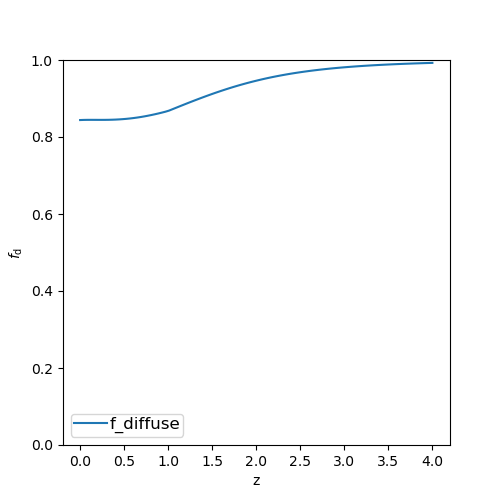

In [31]:
fig = plt.figure(figsize=(5,5))
plt.clf()
ax = plt.gca()
ax.plot(zval, f_diffuse, label='f_diffuse')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$f_{\rm d}$')
ax.set_ylim(0.,1.)
# Legend
legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

----

# Uncertainty

## Assume it is dominated by systematic uncertainty in $\rho_*$

In [32]:
##
rel_err = 0.3
sigma_rho_Mstar = rel_err*rho_Mstar

## In code

In [39]:
reload(igm)
sigma_fd = igm.sigma_fd(zval, rel_err)

## Plot

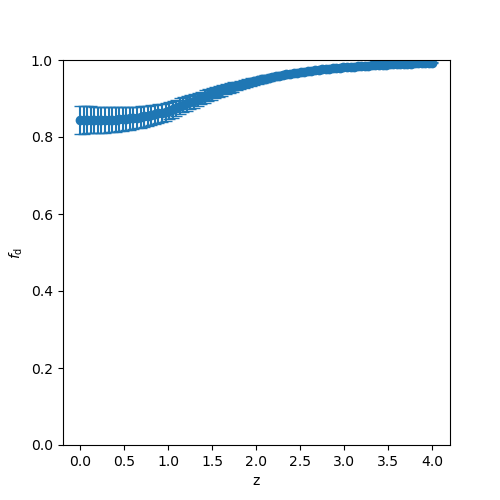

In [43]:
fig = plt.figure(figsize=(5,5))
plt.clf()
ax = plt.gca()
#ax.plot(zval, f_diffuse, label='f_diffuse')
ax.errorbar(zval, f_diffuse, yerr=sigma_fd, fmt='o', capsize=4)  # Adjust marker and capsize as needed

# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$f_{\rm d}$')
ax.set_ylim(0.,1.)
# Legend
#legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.2,
#                       handletextpad=0.1, fontsize='large')
plt.show()